# Resistance/Support Detection

In [15]:
import pandas as pd
df = pd.read_csv("BTCUSD_Candlestick_1_D_BID_01.10.2019-24.09.2022.csv")
df.tail()

,Local time,Open,High,Low,Close,Volume
1086,20.09.2022 14:00:00.000 GMT-0700,18936,19845,18694,18891,0.8975
1087,21.09.2022 14:00:00.000 GMT-0700,18891,19449,18140,19212,1.1559
1088,22.09.2022 14:00:00.000 GMT-0700,19212,19465,18501,18811,0.8004
1089,23.09.2022 14:00:00.000 GMT-0700,18811,19335,18743,19086,0.0584
1090,24.09.2022 14:00:00.000 GMT-0700,19086,19130,18777,18851,0.1035


In [17]:
#Check if NA values are in data
df=df[df['Volume']!=0]
df.reset_index(drop=True, inplace=True)
df.isna().sum()
df.tail()

,Local time,Open,High,Low,Close,Volume
1017,20.09.2022 14:00:00.000 GMT-0700,18936,19845,18694,18891,0.8975
1018,21.09.2022 14:00:00.000 GMT-0700,18891,19449,18140,19212,1.1559
1019,22.09.2022 14:00:00.000 GMT-0700,19212,19465,18501,18811,0.8004
1020,23.09.2022 14:00:00.000 GMT-0700,18811,19335,18743,19086,0.0584
1021,24.09.2022 14:00:00.000 GMT-0700,19086,19130,18777,18851,0.1035


# Support and Resitance FUNCTIONS

In [23]:
def support(df1, l, n1, n2): #n1 n2 before and after candle l
    for i in range(l-n1+1, l+1):
        if(df1.Low[i]>df1.Low[i-1]):
            return 0
    for i in range(l+1,l+n2+1):
        if(df1.Low[i]<df1.Low[i-1]):
            return 0
    return 1

#support(df,46,3,2)

def resistance(df1, l, n1, n2): #n1 n2 before and after candle l
    for i in range(l-n1+1, l+1):
        if(df1.High[i]<df1.High[i-1]):
            return 0
    for i in range(l+1,l+n2+1):
        if(df1.High[i]>df1.High[i-1]):
            return 0
    return 1
#resistance(df, 30, 3, 5)


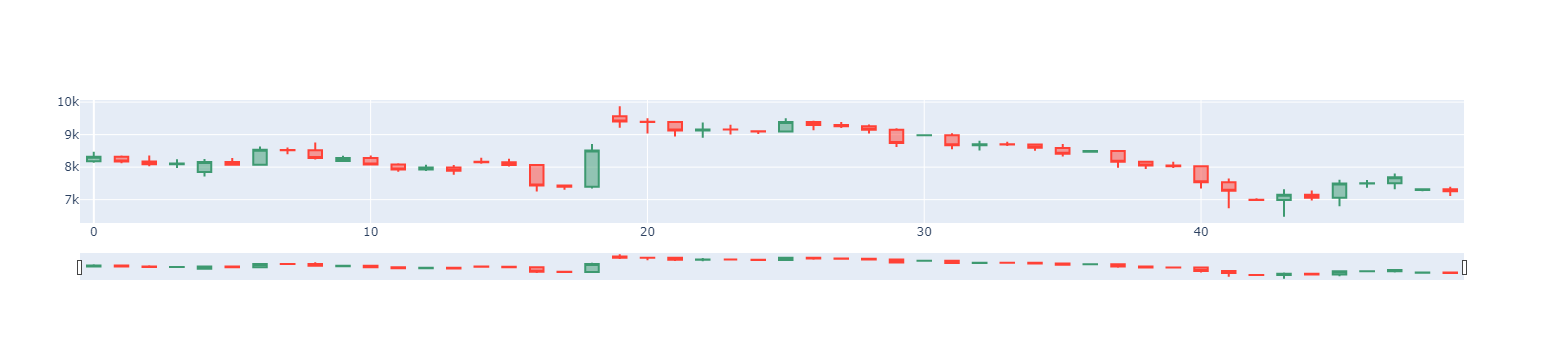

In [24]:
dfpl = df[0:50]
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

fig.show()

In [25]:
sr = []
n1=3
n2=2
for row in range(3, 205): #len(df)-n2
    if support(df, row, n1, n2):
        sr.append((row,df.Low[row],1))
    if resistance(df, row, n1, n2):
        sr.append((row,df.High[row],2))
print(sr)

[(4, 7714, 1), (22, 8903, 1), (63, 6379, 1), (112, 10454, 2), (121, 9968, 2), (125, 8381, 1), (136, 3851, 1), (176, 10016, 2)]


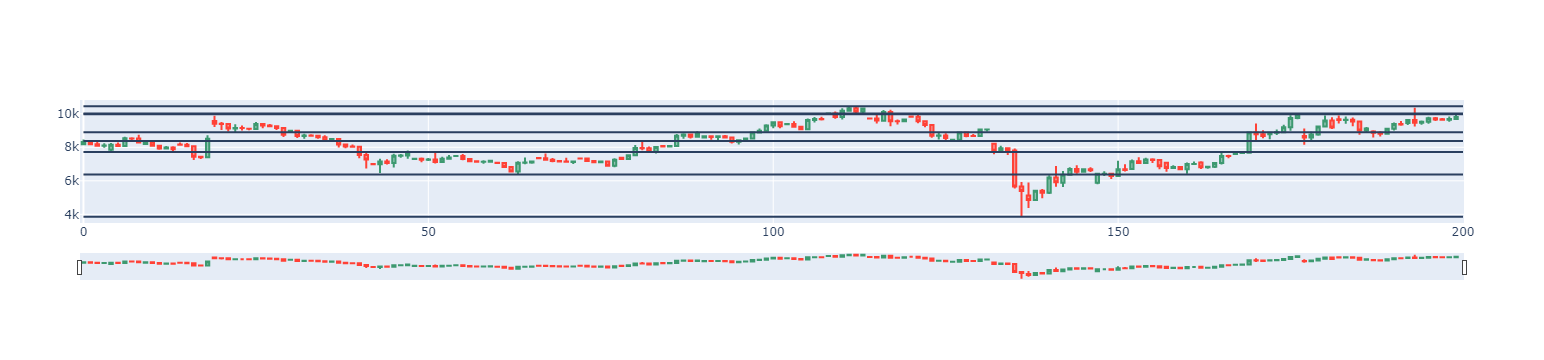

In [27]:
s = 0
e = 200
dfpl = df[s:e]
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

c=0
while (1):
    if(c>len(sr)-1 ):#or sr[c][0]>e
        break
    fig.add_shape(type='line', x0=s, y0=sr[c][1],
                  x1=e,
                  y1=sr[c][1]
                  )#x0=sr[c][0]-5 x1=sr[c][0]+5
    c+=1
fig.show()

In [28]:
plotlist1 = [x[1] for x in sr if x[2]==1]
plotlist2 = [x[1] for x in sr if x[2]==2]
plotlist1.sort()
plotlist2.sort()

for i in range(1,len(plotlist1)):
    if(i>=len(plotlist1)):
        break
    if abs(plotlist1[i]-plotlist1[i-1])<=0.005:
        plotlist1.pop(i)

for i in range(1,len(plotlist2)):
    if(i>=len(plotlist2)):
        break
    if abs(plotlist2[i]-plotlist2[i-1])<=0.005:
        plotlist2.pop(i)
plotlist2
#plt.hist(plotlist, bins=10, alpha=0.5)

[9968, 10016, 10454]

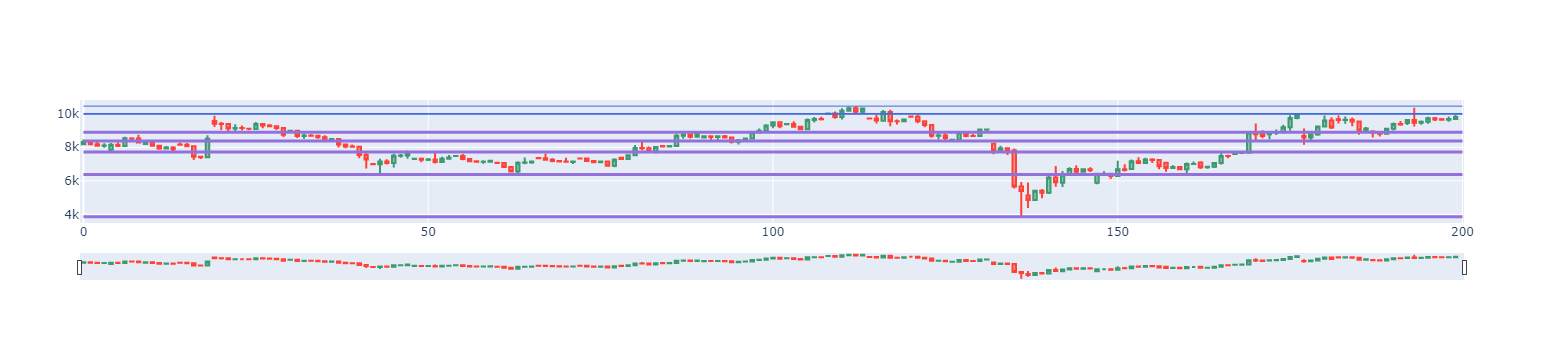

In [29]:
s = 0
e = 200
dfpl = df[s:e]
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

c=0
while (1):
    if(c>len(plotlist1)-1 ):#or sr[c][0]>e
        break
    fig.add_shape(type='line', x0=s, y0=plotlist1[c],
                  x1=e,
                  y1=plotlist1[c],
                  line=dict(color="MediumPurple",width=3)
                  )
    c+=1

c=0
while (1):
    if(c>len(plotlist2)-1 ):#or sr[c][0]>e
        break
    fig.add_shape(type='line', x0=s, y0=plotlist2[c],
                  x1=e,
                  y1=plotlist2[c],
                  line=dict(color="RoyalBlue",width=1)
                  )
    c+=1    

fig.show()

In [30]:
ss = []
rr = []
n1=2
n2=2
for row in range(3, 205): #len(df)-n2
    if support(df, row, n1, n2):
        ss.append((row,df.Low[row]))
    if resistance(df, row, n1, n2):
        rr.append((row,df.High[row]))

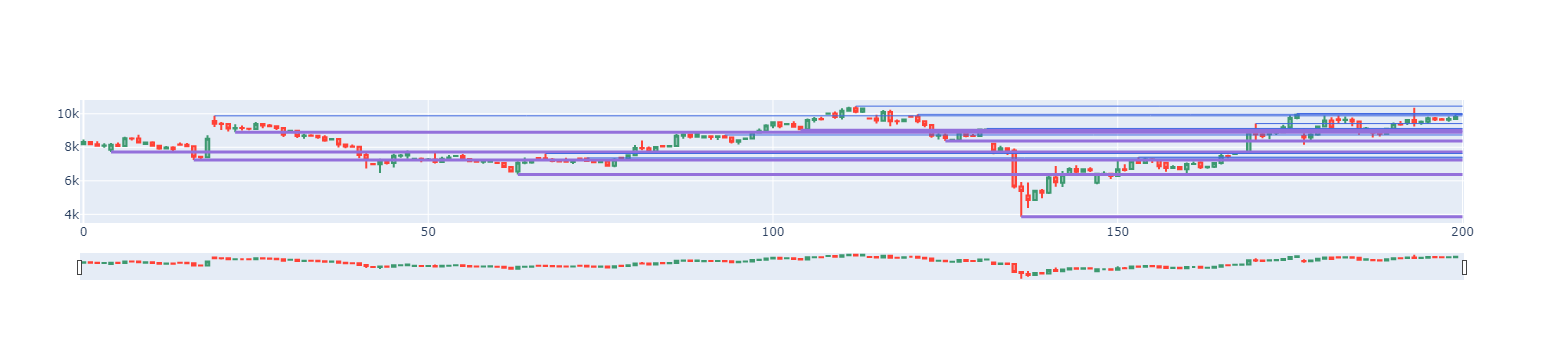

In [31]:
s = 0
e = 200
dfpl = df[s:e]
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

c=0
while (1):
    if(c>len(ss)-1 ):
        break
    fig.add_shape(type='line', x0=ss[c][0], y0=ss[c][1],
                  x1=e,
                  y1=ss[c][1],
                  line=dict(color="MediumPurple",width=3)
                  )
    c+=1

c=0
while (1):
    if(c>len(rr)-1 ):
        break
    fig.add_shape(type='line', x0=rr[c][0], y0=rr[c][1],
                  x1=e,
                  y1=rr[c][1],
                  line=dict(color="RoyalBlue",width=1)
                  )
    c+=1    

fig.show()